In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LogisticRegression

In [2]:
# Step 1: Load the dataset
data_file = r'E:\AAASchoolLearning\StudyResource\GraduateNTU\ProjectSum\DSThinkingProject\SVM\S1Data.csv'
data = pd.read_csv(data_file)

In [3]:
# Step 2: Separate features and target
X = data.drop(['Event', 'TIME'], axis=1)  # Features
y = data['Event']  # Target (Event column)
feature_names = X.columns

In [4]:
# Step 3: Initialize results dictionary for multiple runs
results = {'accuracy': [], 'f1_score': [], 'roc_auc': [], 'mcc': []}
feature_rankings = []

In [5]:
# Step 4: Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}
best_parameters_list = []

In [ ]:
# Step 5: Run the experiment 100 times
for i in range(100):
    print(f'\nExperiment {i + 1}/100')
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Standardize the feature data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=10000), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_parameters_list.append(str(grid_search.best_params_))

    # Make predictions
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    # Collect the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)

    results['accuracy'].append(accuracy)
    results['f1_score'].append(f1)
    results['roc_auc'].append(roc_auc)
    results['mcc'].append(mcc)

    # Step 6: Feature Ranking
    feature_importance = np.abs(best_model.coef_[0])
    feature_ranking = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
    feature_rankings.append([feature for feature, _ in feature_ranking])

In [8]:
# Majority vote for best parameters
from collections import Counter

parameter_votes = Counter(best_parameters_list)
most_common_params, count = parameter_votes.most_common(1)[0]
print(f"Most common best parameters (majority vote): {most_common_params}")
# Display all parameter votes
print("All parameter votes:")
for params, votes in parameter_votes.items():
    print(f"{params}: {votes} votes")

# Display individual parameter votes
c_votes = Counter([eval(p)['C'] for p in best_parameters_list])
penalty_votes = Counter([eval(p)['penalty'] for p in best_parameters_list])
solver_votes = Counter([eval(p)['solver'] for p in best_parameters_list])

print("Votes for each value of C:")
for value, votes in c_votes.items():
    print(f"C = {value}: {votes} votes")

print("Votes for each penalty type:")
for value, votes in penalty_votes.items():
    print(f"Penalty = {value}: {votes} votes")

print("Votes for each solver type:")
for value, votes in solver_votes.items():
    print(f"Solver = {value}: {votes} votes")
# Most common best parameters (majority vote): {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Most common best parameters (majority vote): {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
All parameter votes:
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}: 10 votes
{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}: 20 votes
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}: 9 votes
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}: 27 votes
{'C': 1, 'penalty': 'l2', 'solver': 'saga'}: 4 votes
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}: 13 votes
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}: 7 votes
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}: 3 votes
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}: 3 votes
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}: 3 votes
{'C': 10, 'penalty': 'l1', 'solver': 'saga'}: 1 votes
Votes for each value of C:
C = 0.01: 10 votes
C = 0.1: 54 votes
C = 1: 29 votes
C = 10: 7 votes
Votes for each penalty type:
Penalty = l2: 53 votes
Penalty = l1: 47 votes
Votes for each solver type:
Solver = liblinear: 72 votes
Solver = saga: 28 vot

In [9]:
# Step 7: Calculate average feature ranking
feature_rank_count = defaultdict(int)
for ranking in feature_rankings:
    for rank, feature in enumerate(ranking):
        feature_rank_count[feature] += rank + 1

average_ranking = sorted(feature_rank_count.items(), key=lambda x: x[1] / len(feature_rankings))

print("\nAverage Feature Ranking:")
for rank, (feature, total_rank) in enumerate(average_ranking, start=1):
    print(f"{rank}. Feature: {feature}, Average Rank: {total_rank / len(feature_rankings):.2f}")


Average Feature Ranking:
1. Feature: Ejection.Fraction, Average Rank: 1.68
2. Feature: Creatinine, Average Rank: 1.94
3. Feature: Age, Average Rank: 2.41
4. Feature: Sodium, Average Rank: 5.48
5. Feature: BP, Average Rank: 6.66
6. Feature: CPK, Average Rank: 6.73
7. Feature: Gender, Average Rank: 7.32
8. Feature: Anaemia, Average Rank: 7.61
9. Feature: Diabetes, Average Rank: 8.24
10. Feature: Smoking, Average Rank: 8.52
11. Feature: Pletelets, Average Rank: 9.41


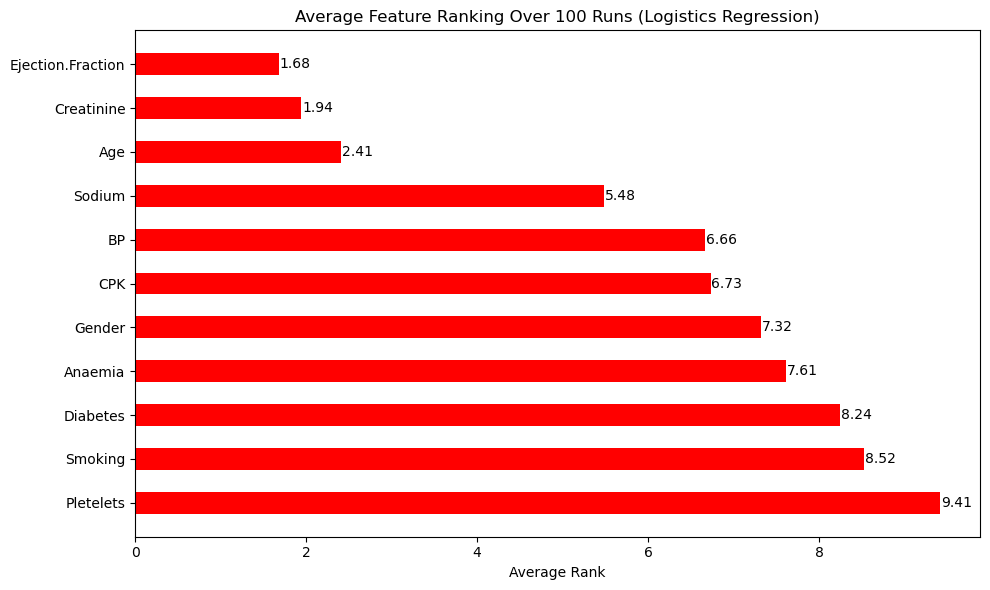

In [10]:
# Visualize the average feature ranking
features, avg_ranks = zip(*[(feature, total_rank / len(feature_rankings)) for feature, total_rank in average_ranking])
plt.figure(figsize=(10, 6))
plt.barh(features, avg_ranks, color='red', height=0.5)
plt.xlabel('Average Rank')
plt.title('Average Feature Ranking Over 100 Runs (Logistics Regression)')
plt.gca().invert_yaxis()
for i, v in enumerate(avg_ranks):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center')
plt.tight_layout()
plt.show()

In [44]:
# Save the average feature ranking to a text file
afr_file = r'E:\AAASchoolLearning\StudyResource\GraduateNTU\ProjectSum\DSThinkingProject\LogRegression_pre_after_ranking\LR_average_feature_ranking.txt'
with open(afr_file, 'w') as f:
    for rank, (feature, total_rank) in enumerate(average_ranking, start=1):
        f.write(f"{rank}. Feature: {feature}, Average Rank: {total_rank / len(feature_rankings):.2f}\n")

In [11]:
# Step 8: Aggregate the results
final_results = {
    'accuracy': np.mean(results['accuracy']),
    'f1_score': np.mean(results['f1_score']),
    'roc_auc': np.mean(results['roc_auc']),
    'mcc': np.mean(results['mcc'])
}

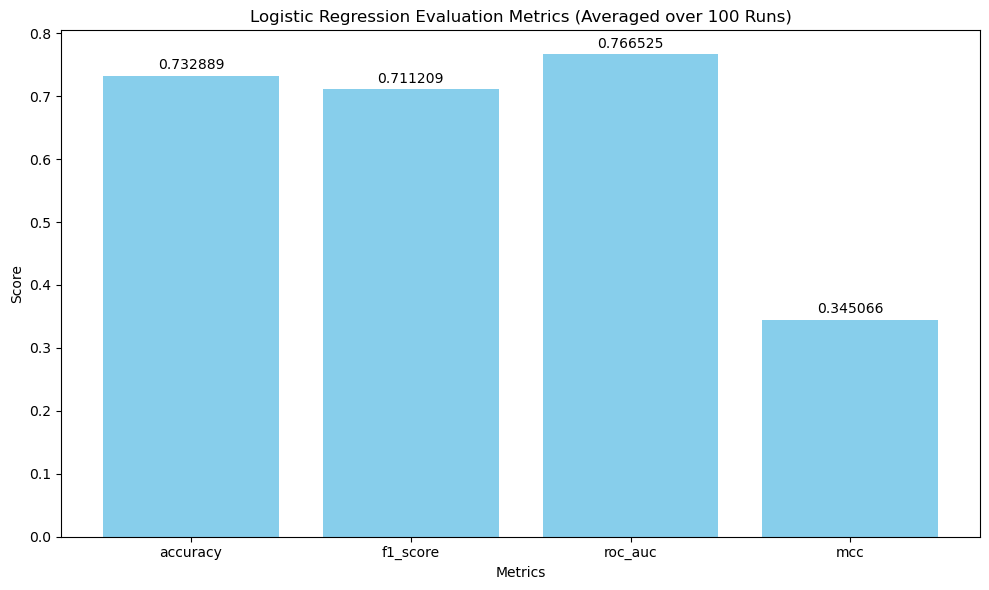

In [12]:
# Step 8: Visualize the results
metrics = ['accuracy', 'f1_score', 'roc_auc', 'mcc']
values = [final_results[metric] for metric in metrics]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Logistic Regression Evaluation Metrics (Averaged over 100 Runs)')
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.6f}', ha='center')
plt.tight_layout()
plt.show()

In [48]:
# Save the final evaluation metrics to a text file
fem_file = r'E:\AAASchoolLearning\StudyResource\GraduateNTU\ProjectSum\DSThinkingProject\LogRegression_pre_after_ranking\LR_final_evaluation_metrics.txt'
with open(fem_file, 'w') as f:
    f.write(f"Accuracy: {final_results['accuracy']:.6f}\n")
    f.write(f"F1 Score: {final_results['f1_score']:.6f}\n")
    f.write(f"ROC AUC: {final_results['roc_auc']:.6f}\n")
    f.write(f"MCC: {final_results['mcc']:.6f}\n")